## DATA DESCRIPTION ##
The given dataset was created by a person namely Ran Geva.
This dataset contains 4 months worth of data from news and blogs about the Coronavirus.
The data format is a zipped file containg .json file. The given .json file is nested


In [4]:
import json
import pandas as pd
import numpy as np
import nltk
import string
#import fasttext
#import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [5]:
covid_data = []
for i in open('covidhealth.json',"r", encoding = 'utf8'):
    covid_data.append(json.loads(i))

In [6]:
x_norm = pd.json_normalize(covid_data)

In [7]:
columns = ["thread.social.facebook.likes","thread.social.facebook.shares","thread.social.facebook.comments","title","published","thread.replies_count","author","url","thread.country","text"]
covid_data = x_norm[columns]
y = covid_data.rename(columns = {"thread.social.facebook.likes" : "fb_likes","thread.social.facebook.shares" : "fb_shares","thread.social.facebook.comments" : "fb_comments","thread.replies_count":"replies_count","thread.country": "country"})

#y.head()


## DATA PREPROCESSING ##

In [8]:
covid_data_csv = y.to_csv("covid.csv",index = None)

In [9]:
#Step 1: Tokenization
import nltk
from nltk.tokenize import *
y["tokenize"] = y["text"].apply(word_tokenize)
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals..."
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new..."
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ..."
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o..."
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,..."


In [10]:
# Step 2: Converting all Characters to Lowercase
y['lower'] = y['tokenize'].apply(lambda x: [word.lower() for word in x])
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize,lower
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals...","[bengaluru, :, isolation, wards, in, hospitals..."
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new..."
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, (, ..."
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o..."
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ,, ”,..."


In [11]:
#Step 3 : Removing Punctuations
punc = string.punctuation
y['no_punc'] = y['lower'].apply(lambda x: [word for word in x if word not in punc])
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize,lower,no_punc
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals...","[bengaluru, :, isolation, wards, in, hospitals...","[bengaluru, isolation, wards, in, hospitals, a..."
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new..."
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, as,..."
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o..."
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ”, at..."


Stop words are irrelevant words that won’t help in identifying a text as real or fake.
We will use “nltk” library for stop-words

In [50]:
#STep 4: removing stopwords
stop_words = set(stopwords.words('english'))
y['stopwords_removed'] = y['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize,lower,no_punc,stopwords_removed,lemmatized,Text_Length
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals...","[bengaluru, :, isolation, wards, in, hospitals...","[bengaluru, isolation, wards, in, hospitals, a...","[bengaluru, isolation, wards, hospitals, acros...","[bengaluru, isolation, ward, hospital, across,...",1227
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[government, making, sure, new, coronavirus, m...","[government, making, sure, new, coronavirus, m...",291
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, as,...","[apart, people, falling, sick, bad, fundamenta...","[apart, people, falling, sick, bad, fundamenta...",323
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, mostly, higher, friday...","[asian, stock, market, mostly, higher, friday,...",2460
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ”, at...","[cash, flow, also, “, strong, ”, us, 1, billio...","[cash, flow, also, “, strong, ”, u, 1, billion...",3915


Stemming and Lemmatizing is the process of reducing a word to its root form. The main purpose is to reduce variations of the same word, thereby reducing the corpus of words we include in the model. The difference between stemming and lemmatizing is that, stemming chops off the end of the word without taking into consideration the context of the word. Whereas, Lemmatizing considers the context of the word and shortens the word into its root form based on the dictionary definition. Stemming is a faster process compared to Lemmatizing. Hence, it a trade-off between speed and accuracy. Here we take into consideration the accuracy.So we are using lemmatization.

In [13]:
#Step 5: Lemmatization
wnl = WordNetLemmatizer()
y['lemmatized'] = y['stopwords_removed'].apply(lambda x: [wnl.lemmatize(word) for word in x])
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize,lower,no_punc,stopwords_removed,lemmatized
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals...","[bengaluru, :, isolation, wards, in, hospitals...","[bengaluru, isolation, wards, in, hospitals, a...","[bengaluru, isolation, wards, hospitals, acros...","[bengaluru, isolation, ward, hospital, across,..."
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[government, making, sure, new, coronavirus, m...","[government, making, sure, new, coronavirus, m..."
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, as,...","[apart, people, falling, sick, bad, fundamenta...","[apart, people, falling, sick, bad, fundamenta..."
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, mostly, higher, friday...","[asian, stock, market, mostly, higher, friday,..."
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ”, at...","[cash, flow, also, “, strong, ”, us, 1, billio...","[cash, flow, also, “, strong, ”, u, 1, billion..."


In [113]:
covid_data_csv = y.to_csv("covidnew.csv",index = None)

## DATA ANALYSIS ##

In [136]:

import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fb_likes           10956 non-null  int64 
 1   fb_shares          10956 non-null  int64 
 2   fb_comments        10956 non-null  int64 
 3   title              10956 non-null  object
 4   published          10956 non-null  object
 5   replies_count      10956 non-null  int64 
 6   author             10956 non-null  object
 7   url                10956 non-null  object
 8   country            10956 non-null  object
 9   text               10956 non-null  object
 10  tokenize           10956 non-null  object
 11  lower              10956 non-null  object
 12  no_punc            10956 non-null  object
 13  stopwords_removed  10956 non-null  object
 14  lemmatized         10956 non-null  object
 15  Text_Length        10956 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 1.

In [146]:
# total number of entries in the csv file
y.shape

(10956, 16)

In [147]:
#statistical analysis of columns which are numerical
y.describe()

,fb_likes,fb_shares,fb_comments,replies_count,Text_Length
count,10956.000000,10956.000000,10956.000000,10956.000000,10956.000000
mean,24.418401,9.666028,8.054491,1.633808,3241.680358
std,413.404466,146.836727,131.703943,13.859999,3788.443389
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1266.000000
50%,0.000000,0.000000,0.000000,0.000000,2436.500000
75%,0.000000,0.000000,0.000000,0.000000,4095.250000
max,20714.000000,6324.000000,6749.000000,266.000000,71528.000000


In [14]:
#length of text field
def length_calc(x):
 x = len(x)
 return x

In [15]:
y["Text_Length"] = y["text"].apply(length_calc)

In [16]:
y.head()

,fb_likes,fb_shares,fb_comments,title,published,replies_count,author,url,country,text,tokenize,lower,no_punc,stopwords_removed,lemmatized,Text_Length
0,0,0,0,"Karnataka: Helplines, isolation wards set up f...",2020-01-31T11:46:00.000+02:00,0,Udayavani,https://m.dailyhunt.in/news/india/english/uday...,IN,Bengaluru: Isolation wards in hospitals across...,"[Bengaluru, :, Isolation, wards, in, hospitals...","[bengaluru, :, isolation, wards, in, hospitals...","[bengaluru, isolation, wards, in, hospitals, a...","[bengaluru, isolation, wards, hospitals, acros...","[bengaluru, isolation, ward, hospital, across,...",1227
1,0,0,0,Health dept. monitoring 24 people for possible...,2020-01-28T02:00:00.000+02:00,0,,http://cnnphilippines.com/videos/2020/1/28/Hea...,US,The government making sure that the new corona...,"[The, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[the, government, making, sure, that, the, new...","[government, making, sure, new, coronavirus, m...","[government, making, sure, new, coronavirus, m...",291
2,0,0,0,,2020-01-31T06:38:00.000+02:00,266,jmccorm,https://news.ycombinator.com/item?id=22194798#...,US,Apart from more people falling sick (as bad as...,"[Apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, (, ...","[apart, from, more, people, falling, sick, as,...","[apart, people, falling, sick, bad, fundamenta...","[apart, people, falling, sick, bad, fundamenta...",323
3,0,0,0,Asian Markets Mostly Higher,2020-01-31T05:53:00.000+02:00,0,rttnews.com,https://www.rttnews.com/3064615/asian-markets-...,US,Asian stock markets are mostly higher on Frida...,"[Asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, are, mostly, higher, o...","[asian, stock, markets, mostly, higher, friday...","[asian, stock, market, mostly, higher, friday,...",2460
4,0,0,0,Tesla soars as bearish analysts left with litt...,2020-01-30T02:00:00.000+02:00,0,Joe Easton,http://www.bnnbloomberg.ca/tesla-soars-as-bear...,CA,"Cash flow was also “very strong,” at more than...","[Cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ,, ”,...","[cash, flow, was, also, “, very, strong, ”, at...","[cash, flow, also, “, strong, ”, us, 1, billio...","[cash, flow, also, “, strong, ”, u, 1, billion...",3915


In [130]:
#Top 5 countries appearing in the blog
#5729 entries are from USA and so on
y['country'].value_counts().head(5)


US    5729
GB     803
IN     584
CA     496
AU     490
Name: country, dtype: int64


There are 10397 posts with zero likes
analysis for total number of posts with 1 like, 2likes and so on is  as follows:
Since the data is biased towards total number of posts with zero likes, we have removed zero from our figure below


Text(0.5, 1.0, 'Analysis of likes on posts')

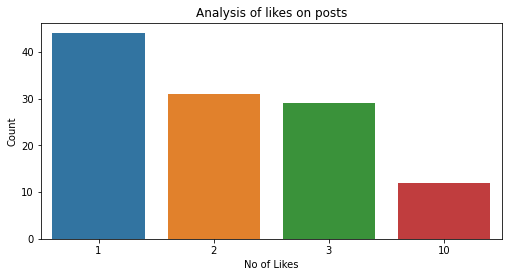

In [142]:
avg_likes = y["fb_likes"].value_counts()[1:5] #highest number of likes
fig = plt.figure(figsize=(8,3))    
ax = fig.add_axes([0,0,0.8,1])   #x and y coordinate
likes_count = avg_likes.index    #in order of highest to lowest using index values
freq = avg_likes                  
sns.barplot(x = likes_count,y = freq)    #to plot the graph
plt.xlabel("No of Likes")
plt.ylabel("Count")
plt.title("Analysis of likes on posts")

Text(0.5, 1.0, 'Top Five Countries')

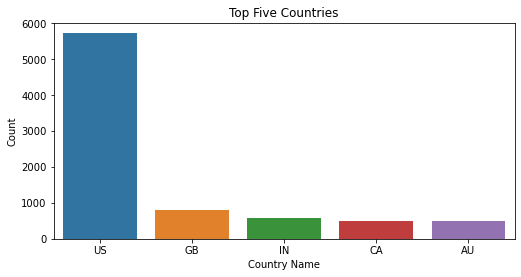

In [144]:
country = y["country"].value_counts().head(5)
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,0.8,1])
country_count = country.index
freq = country
sns.barplot(x = country_count,y = freq)
plt.xlabel("Country Name")
plt.ylabel("Count")
plt.title("Top Five Countries")

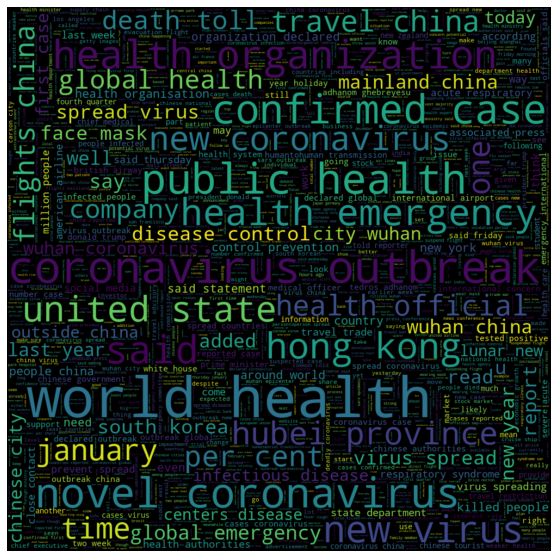

In [158]:
import nltk
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(y["text"])


def punctuation_stop(txt):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(txt)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color = 'black', random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 1000, height = 1000)
wc.generate(text)

plt.figure(figsize = [10,10])
plt.imshow(wc,interpolation = "bilinear")
plt.axis('off')
plt.show()

The following tasks are only for the “text” column: To get a rough understanding of what
these texts were about, you will also perform the following three tasks on the pre-processed data:
• list the top 50 words by frequency
• list the top 50 bigrams by frequencies, and
• list the top 50 bigrams by their Mutual Information scores (using min frequency 5) 

In [27]:
#top 50 words by frequency
y.text.str.split(expand=True).stack().value_counts().head(50)

the            295019
to             170122
of             143794
and            131171
in             125894
a              105675
is              52227
on              51938
for             51221
that            49415
The             46474
from            41558
with            38031
are             34196
have            34096
as              34035
at              32032
has             31408
said            27483
be              26859
China           25870
was             23543
it              22265
by              22053
coronavirus     22012
will            20589
virus           19429
been            18885
not             17992
this            17746
people          17312
an              16512
more            16436
or              16006
its             15863
who             14895
health          14496
new             13717
Chinese         13561
were            13242
which           13050
cases           13039
also            12704
had             12483
about           12439
they      

In [64]:
a = list(y["lemmatized"])
b = ' '.join(str(e) for e in a)


In [71]:
from nltk.tokenize import *
tokens=word_tokenize(b)
text=nltk.Text(tokens)
text[:20]

['[',
 "'bengaluru",
 "'",
 ',',
 "'isolation",
 "'",
 ',',
 "'ward",
 "'",
 ',',
 "'hospital",
 "'",
 ',',
 "'across",
 "'",
 ',',
 "'karnataka",
 "'",
 ',',
 "'helpline"]

In [72]:
# Creating a frequency distribution of words
from nltk import FreqDist
ndist = FreqDist(text)

# print the top 50 tokens by frequency
nitems = ndist.most_common(50)
nitems

[("'", 3886256),
 (',', 3809005),
 ("''", 210043),
 ('``', 147989),
 ("'china", 45967),
 ("'said", 39966),
 ('’', 36554),
 ("'coronavirus", 34556),
 ('.', 28892),
 ("'virus", 28776),
 ("'health", 26806),
 ('“', 24866),
 ("'s", 23202),
 ('”', 22715),
 ("'case", 21188),
 ("'people", 21097),
 ("'new", 19479),
 ("'outbreak", 18229),
 ("'wuhan", 17506),
 ("'country", 15560),
 ("'chinese", 13862),
 ("'also", 13542),
 ("'flight", 13135),
 ("'spread", 13010),
 ("'year", 11632),
 ("'world", 11044),
 ("'2020", 11033),
 ('[', 10956),
 (']', 10956),
 ("'thursday", 10280),
 ("'travel", 10228),
 ("'first", 9828),
 ("'global", 9254),
 ("'one", 9016),
 ("'would", 8997),
 ("'confirmed", 8907),
 ("'day", 8755),
 ("'city", 8596),
 ("'state", 8552),
 ("'market", 8495),
 ('u.s', 8495),
 ("'emergency", 8474),
 ("'government", 8362),
 ("'disease", 8216),
 ("'week", 8192),
 ("'two", 8058),
 ("'time", 7834),
 ("'public", 7765),
 ("'friday", 7739),
 ("'say", 7629)]

In [35]:
textbigrams = list(nltk.bigrams(text))

# setup for bigrams and bigram measures
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# create the bigram finder and score the bigrams by frequency
finder = BigramCollocationFinder.from_words(text)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [36]:
scored[:50]

[(('of', 'the'), 0.005322903221887382),
 (('.', 'The'), 0.004839108116129339),
 (('in', 'the'), 0.003699694710101873),
 ((',', "''"), 0.003501403801284451),
 (('’', 's'), 0.00340898374969121),
 ((',', 'the'), 0.0027734693417088944),
 (("''", ':'), 0.0027532208171031766),
 ((',', 'and'), 0.0023549034116449844),
 (('to', 'the'), 0.002297339748837301),
 (('the', 'virus'), 0.0021981219782692832),
 ((':', "''"), 0.002100061266250164),
 (('.', '“'), 0.0018298880950824432),
 (('in', 'China'), 0.0018047220716439084),
 (('.', '``'), 0.0015569669098610894),
 (('for', 'the'), 0.0014865309706969137),
 (('on', 'the'), 0.0014126238558860437),
 (('said', '.'), 0.0013967143008386939),
 ((',', '”'), 0.0013524568113433392),
 (("''", ','), 0.0013233857153022728),
 (('the', 'coronavirus'), 0.0013099349096713318),
 (('from', 'the'), 0.001267268375680712),
 ((',', 'which'), 0.0012162131672105805),
 (('with', 'the'), 0.0012011714060749044),
 (('have', 'been'), 0.0011828031016111462),
 (('and', 'the'), 0.0011

In [38]:
# apply a filter (on a new finder) to remove low frequency words
finder2 = BigramCollocationFinder.from_words(text)
finder2.apply_freq_filter(5)
scored2 = finder2.score_ngrams(bigram_measures.raw_freq)
scored2[:50]

[(('of', 'the'), 0.005322903221887382),
 (('.', 'The'), 0.004839108116129339),
 (('in', 'the'), 0.003699694710101873),
 ((',', "''"), 0.003501403801284451),
 (('’', 's'), 0.00340898374969121),
 ((',', 'the'), 0.0027734693417088944),
 (("''", ':'), 0.0027532208171031766),
 ((',', 'and'), 0.0023549034116449844),
 (('to', 'the'), 0.002297339748837301),
 (('the', 'virus'), 0.0021981219782692832),
 ((':', "''"), 0.002100061266250164),
 (('.', '“'), 0.0018298880950824432),
 (('in', 'China'), 0.0018047220716439084),
 (('.', '``'), 0.0015569669098610894),
 (('for', 'the'), 0.0014865309706969137),
 (('on', 'the'), 0.0014126238558860437),
 (('said', '.'), 0.0013967143008386939),
 ((',', '”'), 0.0013524568113433392),
 (("''", ','), 0.0013233857153022728),
 (('the', 'coronavirus'), 0.0013099349096713318),
 (('from', 'the'), 0.001267268375680712),
 ((',', 'which'), 0.0012162131672105805),
 (('with', 'the'), 0.0012011714060749044),
 (('have', 'been'), 0.0011828031016111462),
 (('and', 'the'), 0.0011

In [39]:
### pointwise mutual information
finder3 = BigramCollocationFinder.from_words(text)
scored3 = finder3.score_ngrams(bigram_measures.pmi)
scored3[:50]

[(("'15", 'most-wanted'), 22.72110670049858),
 (("'All-out", "effort'"), 22.72110670049858),
 (("'BBC", 'Thought'), 22.72110670049858),
 (("'BEER", "VIRUS'"), 22.72110670049858),
 (("'Increasingly", "uneasy'"), 22.72110670049858),
 (("'Karoo", 'firewalkers'), 22.72110670049858),
 (("'ONLY", 'FOOLS'), 22.72110670049858),
 (("'Operation", 'Rahat'), 22.72110670049858),
 (("'appetite", 'suppressant'), 22.72110670049858),
 (("'cancer", "free'"), 22.72110670049858),
 (("'disgrace'", '10.48pm'), 22.72110670049858),
 (("'physical", "harm'"), 22.72110670049858),
 (("'pillow", 'fists'), 22.72110670049858),
 (("'terminal", "host'—humans"), 22.72110670049858),
 (("'white", "war'.It"), 22.72110670049858),
 (("'\x9cextraordinary", "event'\x9d"), 22.72110670049858),
 (('+0.6455', 'Dollar/Dollar'), 22.72110670049858),
 (('+0.6494', '+0.6455'), 22.72110670049858),
 (('+0.6729', '+0.6684'), 22.72110670049858),
 (('+0.8434', '+0.8388'), 22.72110670049858),
 (('+0.9667', 'Sterling/Dollar'), 22.72110670049